<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool06_AzureML/blob/main/AzML04_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Azure ML Notebook 
- 노트북으로 Azure ML 기능 실행시킬 수 있음

>## 1) Create

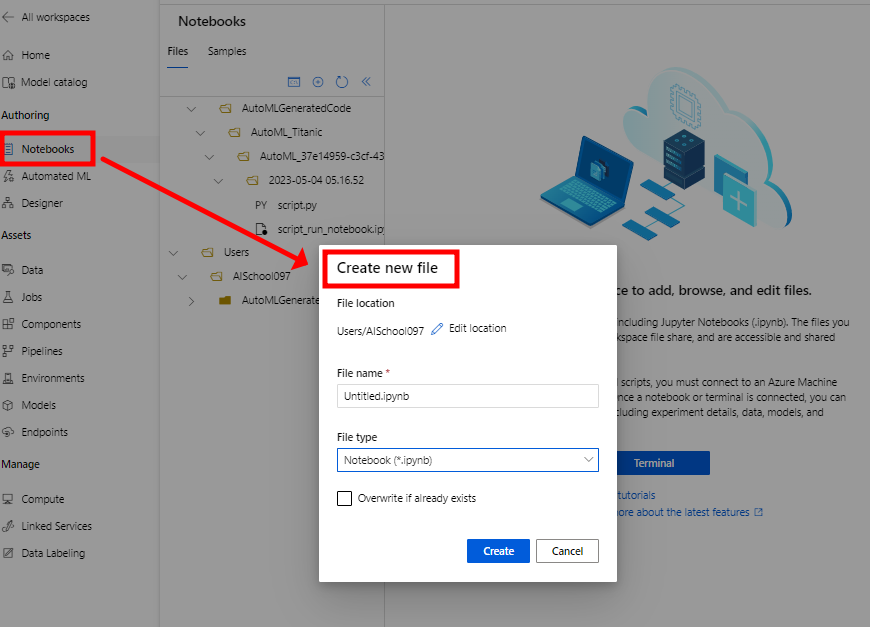

>## 2) Notebook 버전 선택

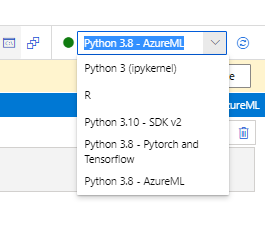

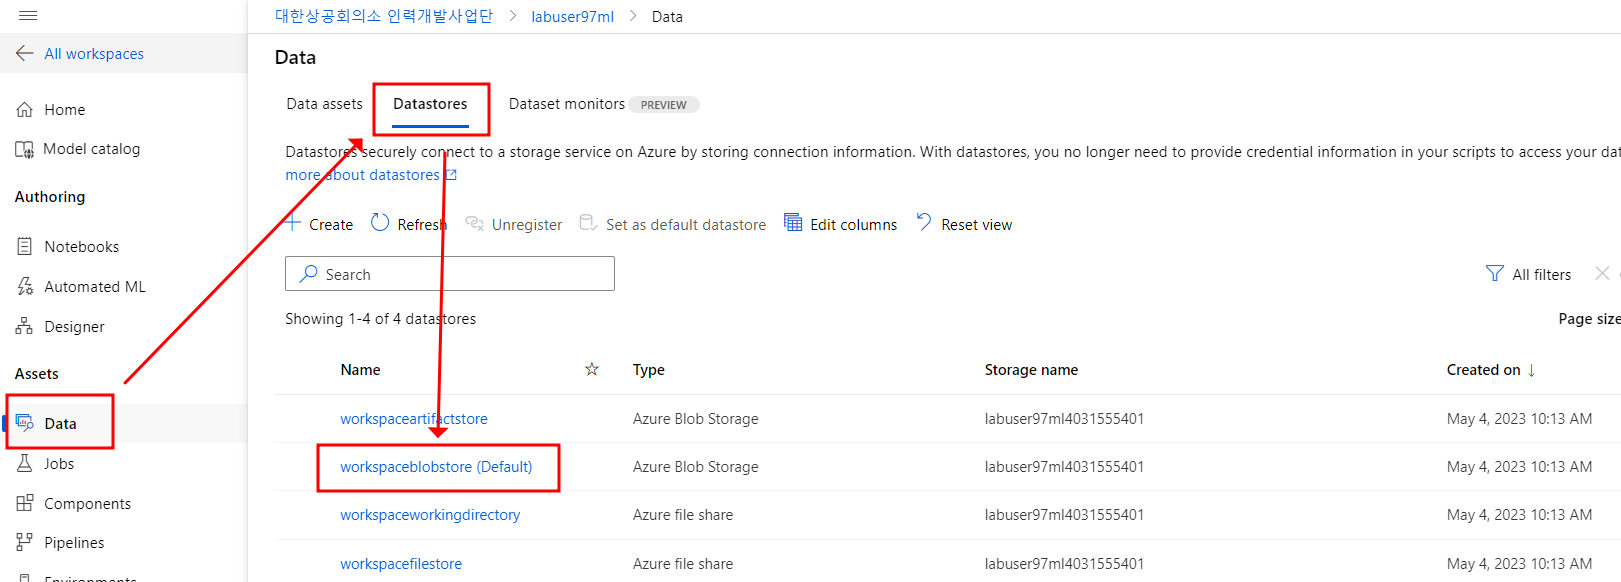

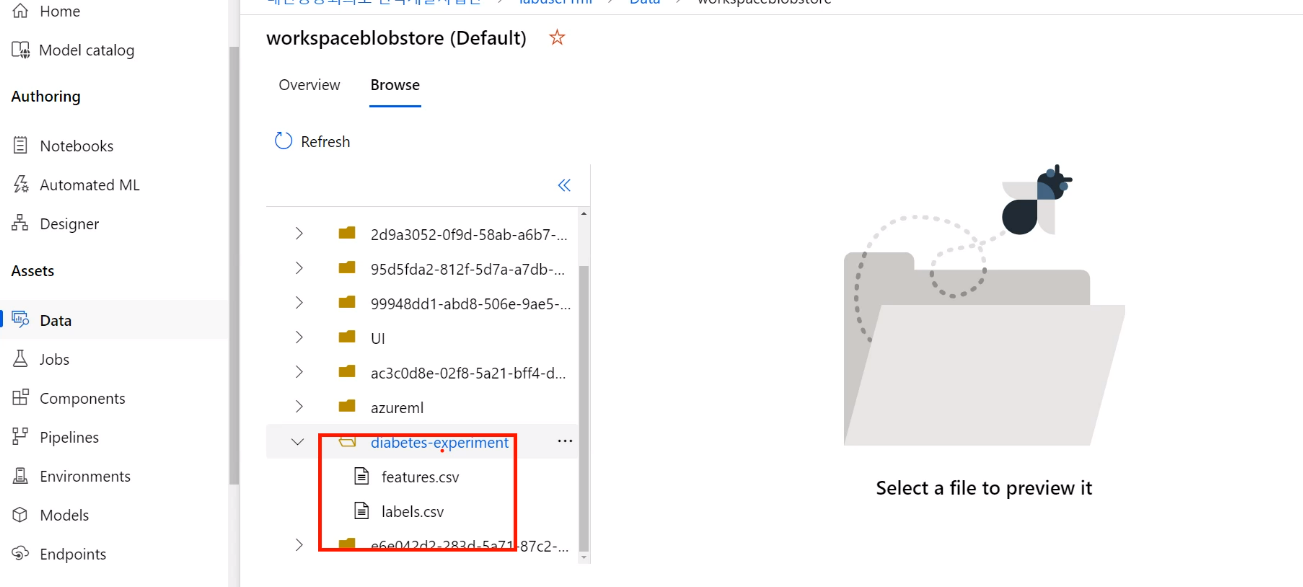

# 2. 활용 - 기본세팅 (데이터 분리까지)

>## 1) Workspace 확인

In [ ]:
from azureml.core import Workspace
ws = Workspace.from_config()
print('Workspace name:' + ws.name,
        'Azure region:' + ws.location,
        'Subscription ID:' + ws.subscription_id,
        'Resource group:' + ws.resource_group)

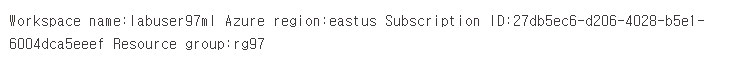

>## 2) 실험공간 준비

In [ ]:
from azureml.core import Experiment
experiment = Experiment(workspace=ws, name='diabetes-experiment')  #현재 워크스페이스에 만들기, 실험이름

>## 3) 데이터 준비

In [ ]:
#데이터준비
from azureml.opendatasets import Diabetes
from sklearn.model_selection import train_test_split

x_df = Diabetes.get_tabular_dataset().to_pandas_dataframe()
x_df

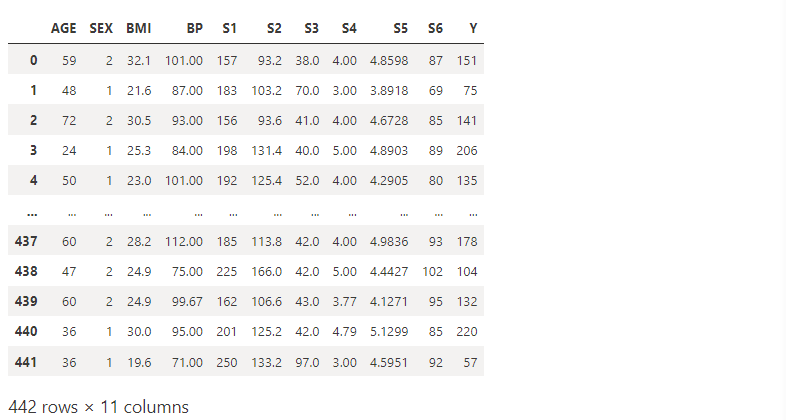

>## 4) 데이터준비 - Y 컬럼 데이터 똑떼서(pop) 라벨로 만들기

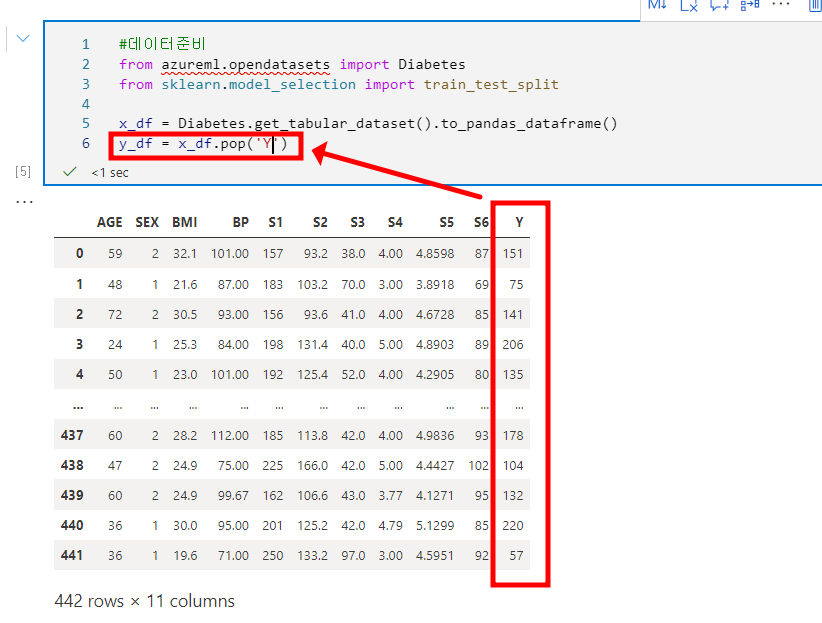

In [ ]:
#데이터준비 - Y 컬럼 데이터를 똑 떼서 x_df에 넣기
from azureml.opendatasets import Diabetes
from sklearn.model_selection import train_test_split

x_df = Diabetes.get_tabular_dataset().to_pandas_dataframe()
y_df = x_df.pop('Y')
x_df

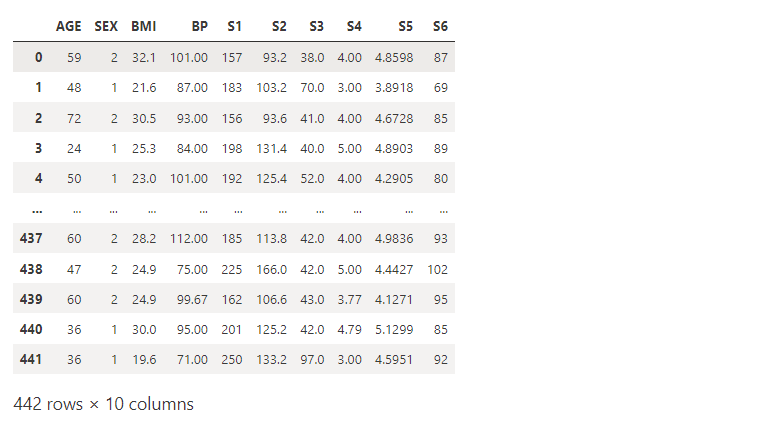

>## 5) X, Y 훈련/테스트용 데이터 분리

In [ ]:
#데이터준비
from azureml.opendatasets import Diabetes
from sklearn.model_selection import train_test_split

#Y컬럼 라벨화
x_df = Diabetes.get_tabular_dataset().to_pandas_dataframe()
y_df = x_df.pop('Y')
x_df

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=99)

#잘 분리되었는지 확인
print(X_train) 

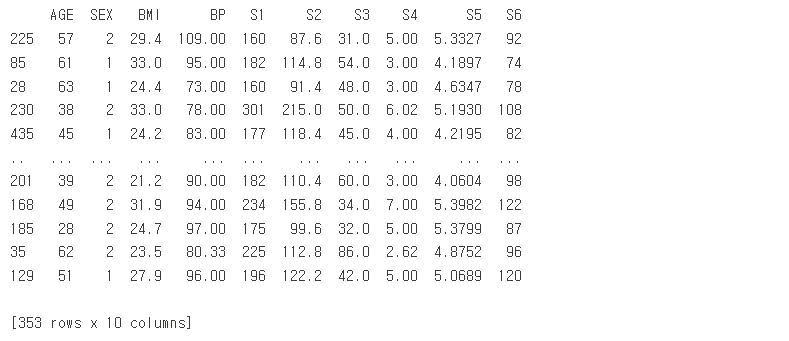

# 3. 활용 - 모델훈련, 로그, 모델파일 관리

>## 1) 기본세팅 - 모델가져오기

In [ ]:
#모델가져오기
from sklearn.linear_model import Ridge

#평균제곱오차(예측값과 실제값 차이 면적의 평균)
from sklearn.metrics import mean_squared_error

#학습모델 바로 저장
from sklearn.externals import joblib

#수학사용
import math

>## 2) 알파값 배열

In [ ]:
#알파값 배열
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

>## 3) 반복문으로 최적값 찾기 (학습문 포함)

- 10번 반복해서 학습하기

In [ ]:
#모델가져오기
from sklearn.linear_model import Ridge

#평균제곱오차(예측값과 실제값 차이 면적의 평균)
from sklearn.metrics import mean_squared_error

#학습모델 바로 저장
from sklearn.externals import joblib

#수학사용
import math

#알파값 배열
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#반복문으로 최적값 찾기(10번 반복해서 학습하기)
for alpha in alphas:
    print(alpha)

    #실험기록
    run = experiment.start_logging()
    run.log('alpha_value', alpha)

    #학습문 작성
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train) 

    #예측문 작성
    y_pred = model.predict(X_test)

    #mse(예측값과 실제값 차이 면적의 평균)값 구하기
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    #결과 확인
    print('model_alpha={0}, mse={1}'.format(alpha,rmse))
    run.complete()

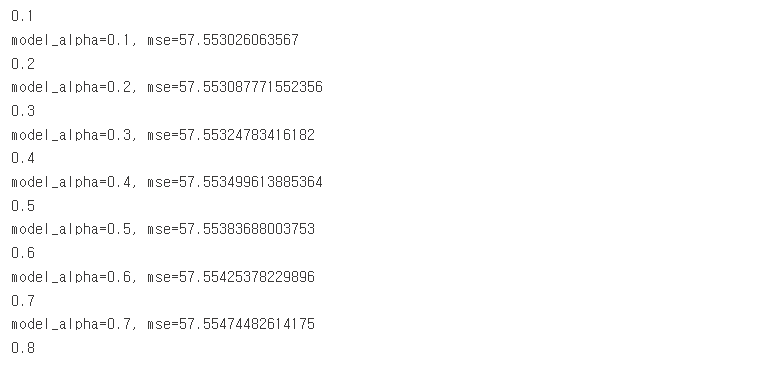

>## 4) 모델 파일 저장하기

In [ ]:
#모델가져오기
from sklearn.linear_model import Ridge

#평균제곱오차(예측값과 실제값 차이 면적의 평균)
from sklearn.metrics import mean_squared_error

#학습모델 바로 저장
from sklearn.externals import joblib

#수학사용
import math

#알파값 배열
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#반복문으로 최적값 찾기(10번 반복해서 학습하기)
for alpha in alphas:
    print(alpha)

    #실험기록
    run = experiment.start_logging()
    run.log('alpha_value', alpha)

    #학습문 작성
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train) 

    #예측문 작성
    y_pred = model.predict(X_test)

    #mse(예측값과 실제값 차이 면적의 평균)값 구하기
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    #결과 확인
    print('model_alpha={0}, mse={1}'.format(alpha,rmse))


    #모델을 파일로 저장
    model_name = 'model_alpha_' + str(alpha) + '.pkl'
    filename = 'outputs/' + model_name
    joblib.dump(value=model, filename=filename)

    #Azure ML Service에 모델 파일 업로드
    run.upload_file(name=model_name, path_or_stream=filename)

    run.complete()

- 좌측 노트북 파일목록에 실험 기록 저장됨

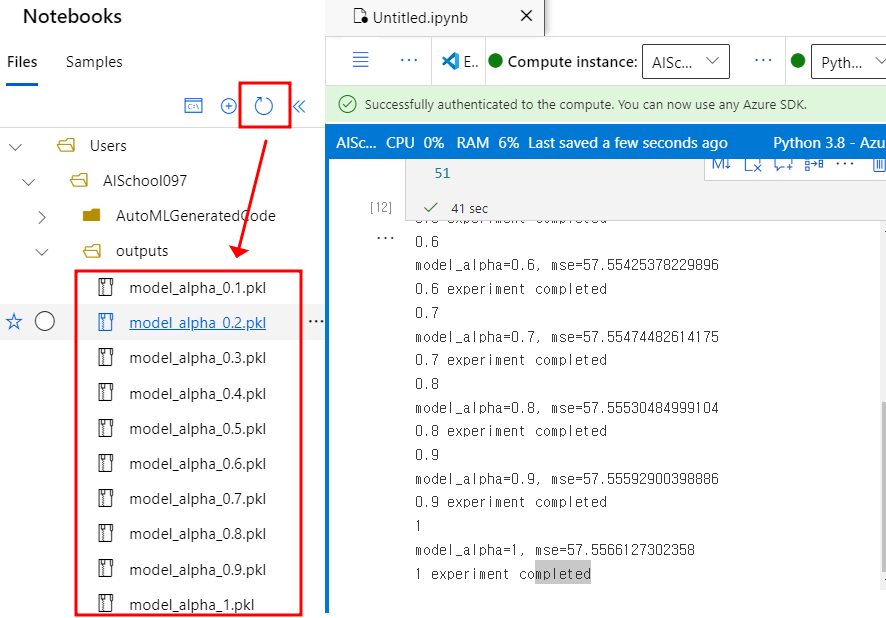

>## 5) 실험 완료문 출력

In [ ]:
#모델가져오기
from sklearn.linear_model import Ridge

#평균제곱오차(예측값과 실제값 차이 면적의 평균)
from sklearn.metrics import mean_squared_error

#학습모델 바로 저장
from sklearn.externals import joblib

#수학사용
import math

#알파값 배열
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#반복문으로 최적값 찾기(10번 반복해서 학습하기)
for alpha in alphas:
    print(alpha)

    #실험기록
    run = experiment.start_logging()
    run.log('alpha_value', alpha)

    #학습문 작성
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train) 

    #예측문 작성
    y_pred = model.predict(X_test)

    #mse(예측값과 실제값 차이 면적의 평균)값 구하기
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    #결과 확인
    print('model_alpha={0}, mse={1}'.format(alpha,rmse))


    #모델을 파일로 저장
    model_name = 'model_alpha_' + str(alpha) + '.pkl'
    filename = 'outputs/' + model_name
    joblib.dump(value=model, filename=filename)

    #Azure ML Service에 모델 파일 업로드
    run.upload_file(name=model_name, path_or_stream=filename)

    run.complete()

    #완료문 출력
    print(f'{alpha} experiment completed')

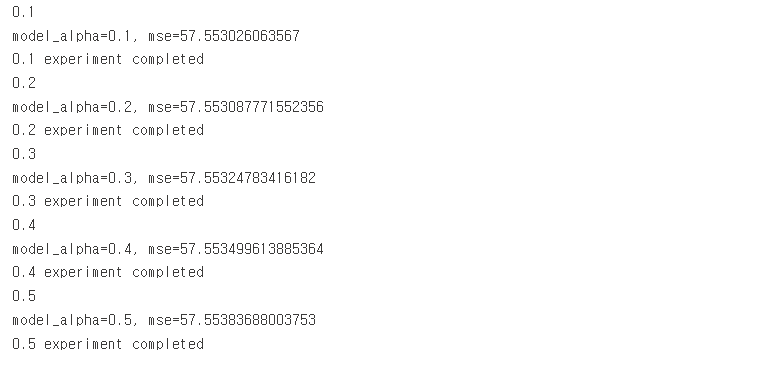

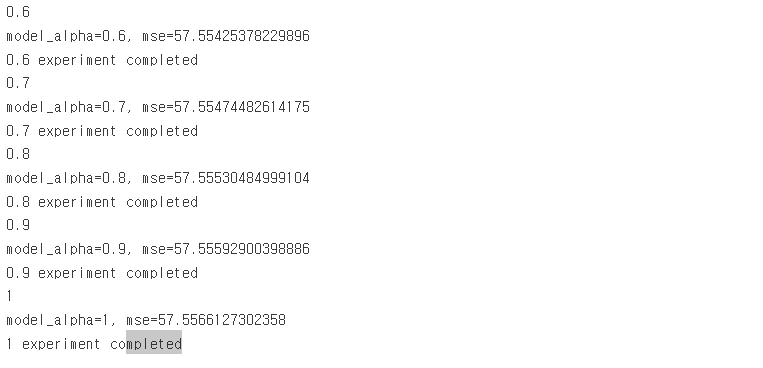

>## 6) 완료된 실험은 Job - Model 에서 확인 가능

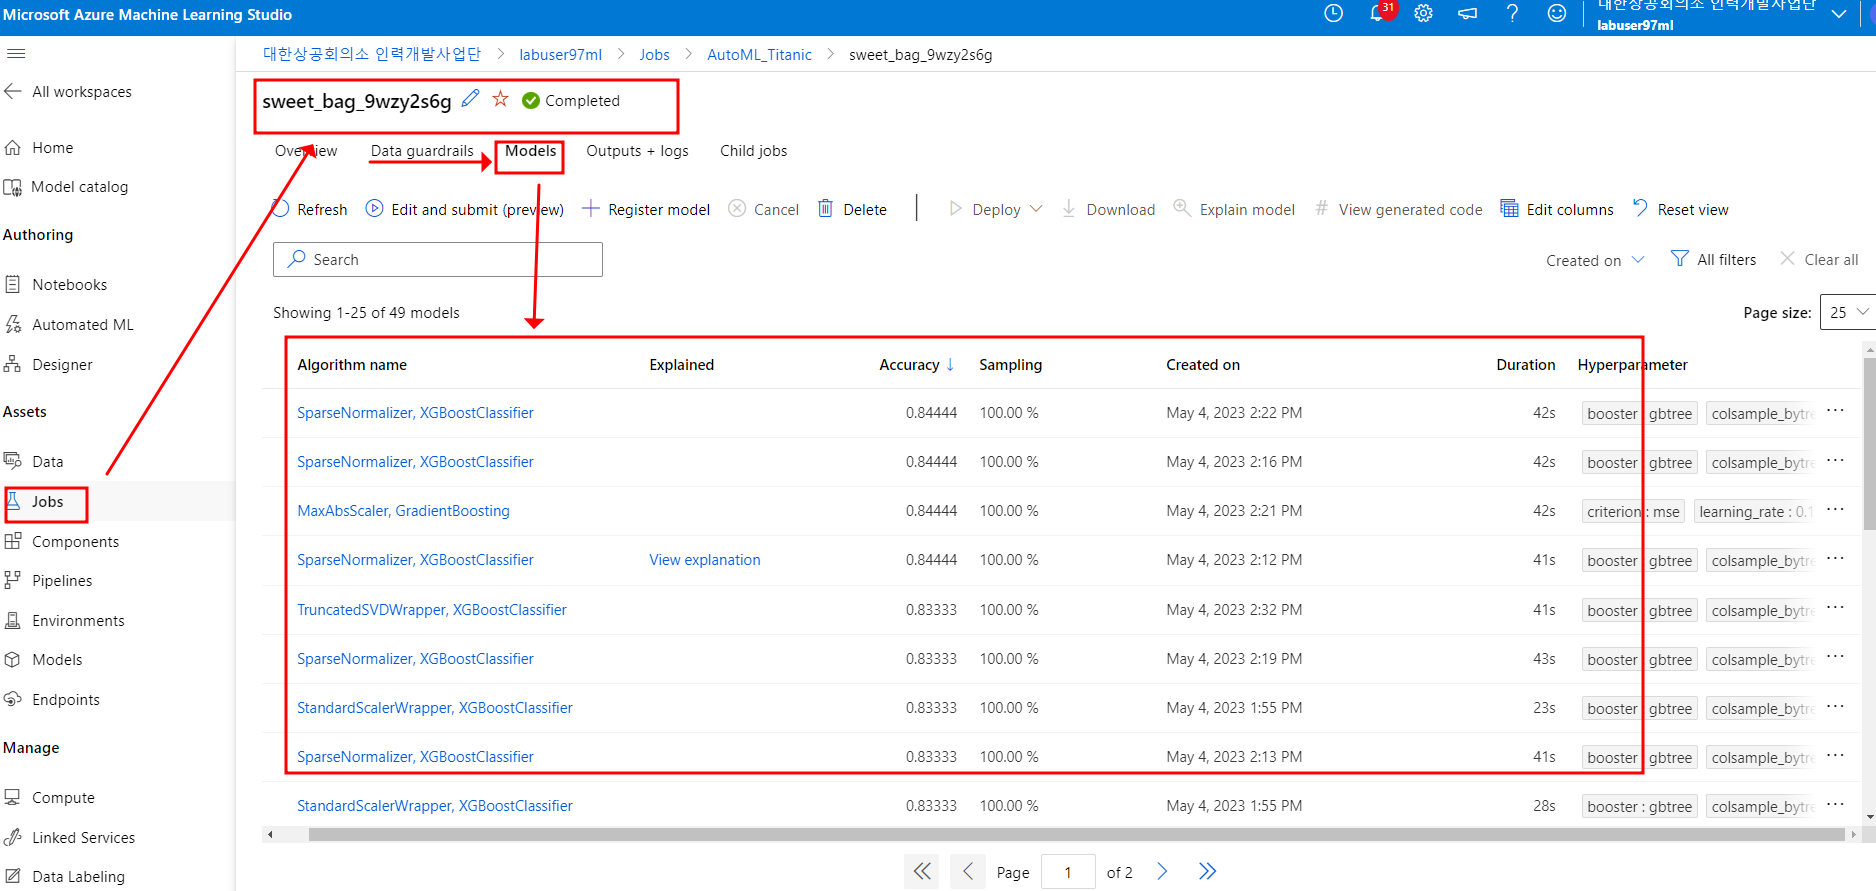

>## 7) Notebook에 Experiment 작성하면 실험 정보 확인 가능

In [ ]:
experiment

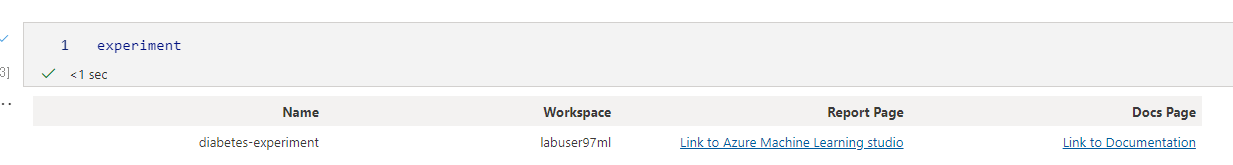

# 4. Best Model 탐색 후 다운로드

>## 1) Best 값 찾기

In [ ]:
#Best 값 찾기
minimum_rmse = None
minimum_rmse_runid = None

for exp in experiment.get_runs():
    run_metrics = exp.get_metrics();
    run_details = exp.get_details();

    run_rmse = run_metrics['rmse']
    run_id = run_details['runID']


    #가장 낮은 RMSE값 가진 실행 ID 구하기
    if minimum_rmse is None:
        minimum_rmse = run_rmse
        minimum_rmse_runid = run_id
    else:
        if run_rmse < minimum_rmse:
            minimum_rmse_runid = run_id

print('Best run_id: ' + minimum_rmse_runid)
print('Best run_id_rmse: ' + str(minimum_rmse))

>## 2) Best 값 출력해서 파일로 다운로드

In [ ]:
#Best값 출력하고 파일로 다운로드 하기
from azureml.core import Run 
best_run = Run(experiment=experiment, run_id=minimum_rmse_runid)
print(best_run.get_file_names())

best_run.download_file(name=str(best_run.get_file_names()[0]))

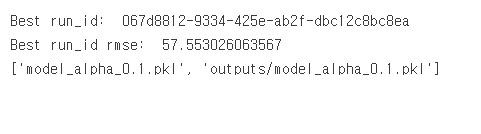

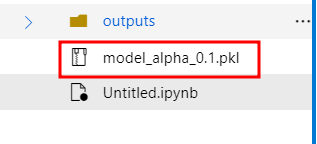

# 5. 활용 - 데이터 관리

>## 1) 데이터 저장하기

In [ ]:
#데이터 저장

import numpy as np
from azureml.core import Dataset

np.savetxt('features.csv',X_train ,delimiter=',')
np.savetxt('labels.csv', y_train, delimiter=',')

datastore = ws.get_default_datastore()

datastore.upload_files(files=['./features.csv','./labels.csv'],
                        target_path='diabetes-experiment/',
                        overwrite=True)

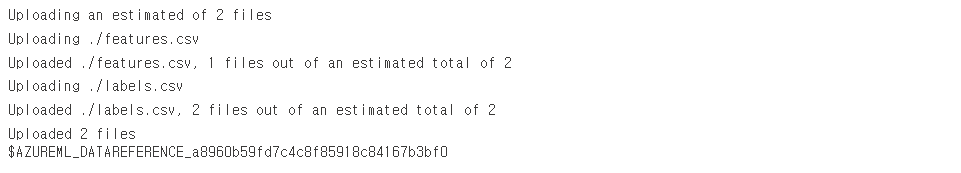

>## 2) 데이터 가져오기

In [ ]:
#데이터 가져오기

feature_dataset = Dataset.Tabular.from_delimited_files(path=[(datastore, 'diabetes-experiment/features.csv')])
label_dataset = Dataset.Tabular.from_delimited_files(path=[(datastore, 'diabetes-experiment/labels.csv')])

>## 3) 패키지 불러오기

In [ ]:
#패키지 불러오기 
import sklearn
from azureml.core import Model 
from azureml.core.resource_configuration import ResourceConfiguration

# 6. 모델 등록 및 배포

>## 1) 모델 등록

In [ ]:
#모델 등록 

model = Model.register(workspace=ws,
                model_name='diabetes-experiment-model',
                model_path= f'./{str(best_run.get_file_names()[0])}',
                model_framework=Model.Framework.SCIKITLEARN,
                model_framework_version=sklearn.__version__,
                sample_input_dataset=feature_dataset,
                sample_output_dataset=label_dataset,
                resource_configuration=ResourceConfiguration(cpu=1, memory_in_gb=0.5),
                description='Ridge regression model to predict diabetes progression',
                tags={'area':'diabetes','type':'regression'}
                )

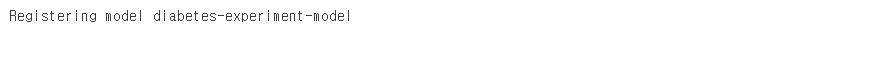

>## 2) 모델의 배포

In [ ]:
# 모델의 배포
service_name = 'diabetes-service'

service = Model.deploy(ws, service_name, [model], overwrite=True)
service.wait_for_deployment(show_output=True)

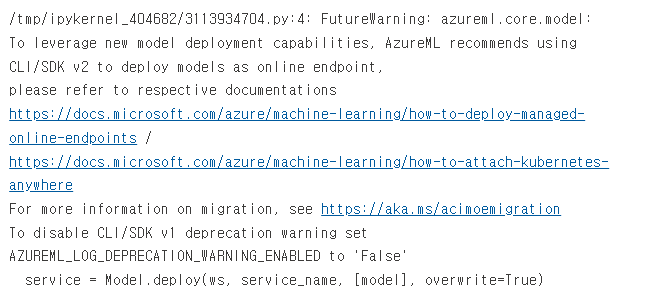

>## 3) 배포된 모델로 예측하기

In [ ]:
import json


input_payload = json.dumps({
    'data': X_train[0:2].values.tolist(),
    'method': 'predict'
})

output = service.run(input_payload)

print(output)

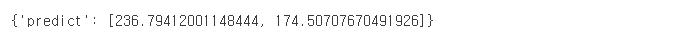